<a href="https://colab.research.google.com/github/ghinafairuz/tugas_pra_uas_Datmin/blob/main/Untitled3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Library\
pandas untuk memanipulasi dataset\
sklearn metrics untuk menggunakan metrics evaluasi \
KNeighborsClassifier untuk import algoritma KNN \
train test split untuk membagi dataset


In [ ]:
import pandas as pd
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

df.info()\
melihat atribut dataset dan typenya

In [ ]:
df = pd.read_csv('fake_bills.csv',sep=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


10 data teratas

In [ ]:
df.head(10)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
5,True,172.17,103.74,104.08,4.42,2.95,112.81
6,True,172.34,104.18,103.85,4.58,3.26,112.81
7,True,171.88,103.76,104.08,3.98,2.92,113.08
8,True,172.47,103.92,103.67,4.00,3.25,112.85
9,True,172.47,104.07,104.02,4.04,3.25,113.45


menghapus 500 baris pertama pada dataset untuk menyeimbangkan jumlah bill yang fake dan yang asli kurang lebih berjumlah 500 asli dan 500 palsu

In [ ]:
df = df.drop(df.head(500).index)

In [ ]:
df

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
500,True,171.95,104.11,103.87,4.20,2.81,113.52
501,True,171.87,103.73,103.69,4.06,3.10,112.96
502,True,171.70,103.79,103.98,4.44,3.03,113.94
503,True,172.46,103.51,103.85,4.23,3.14,113.38
504,True,171.68,103.95,103.60,3.98,2.93,113.22
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


merubah value boolean menjadi 0 dan 1

In [ ]:
df = df.replace({True: 1, False: 0})
df

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
500,1,171.95,104.11,103.87,4.20,2.81,113.52
501,1,171.87,103.73,103.69,4.06,3.10,112.96
502,1,171.70,103.79,103.98,4.44,3.03,113.94
503,1,172.46,103.51,103.85,4.23,3.14,113.38
504,1,171.68,103.95,103.60,3.98,2.93,113.22
...,...,...,...,...,...,...,...
1495,0,171.75,104.38,104.17,4.42,3.09,111.28
1496,0,172.19,104.63,104.44,5.27,3.37,110.97
1497,0,171.80,104.01,104.12,5.51,3.36,111.95
1498,0,172.06,104.28,104.06,5.17,3.46,112.25


mengecek apakah terdapat missing value

In [ ]:
df.isnull().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      25
margin_up        0
length           0
dtype: int64

In [ ]:
df[df.isnull().any(axis=1)]

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
505,1,172.01,103.97,104.05,NaN,2.98,113.65
611,1,171.80,103.68,103.49,NaN,3.30,112.84
654,1,171.97,103.69,103.54,NaN,2.70,112.79
675,1,171.60,103.85,103.91,NaN,2.56,113.27
710,1,172.03,103.97,103.86,NaN,3.07,112.65
739,1,172.07,103.74,103.76,NaN,3.09,112.41
742,1,172.14,104.06,103.96,NaN,3.24,113.07
780,1,172.41,103.95,103.79,NaN,3.13,113.41
798,1,171.96,103.84,103.62,NaN,3.01,114.44
844,1,171.62,104.14,104.49,NaN,2.99,113.35


menghapus missing value

In [ ]:
df_clean = df.dropna()

Mendefinisikan atribut pada X dan label pada y

In [ ]:
X = df_clean.drop(['is_genuine'], axis=1)
X

,diagonal,height_left,height_right,margin_low,margin_up,length
500,171.95,104.11,103.87,4.20,2.81,113.52
501,171.87,103.73,103.69,4.06,3.10,112.96
502,171.70,103.79,103.98,4.44,3.03,113.94
503,172.46,103.51,103.85,4.23,3.14,113.38
504,171.68,103.95,103.60,3.98,2.93,113.22
...,...,...,...,...,...,...
1495,171.75,104.38,104.17,4.42,3.09,111.28
1496,172.19,104.63,104.44,5.27,3.37,110.97
1497,171.80,104.01,104.12,5.51,3.36,111.95
1498,172.06,104.28,104.06,5.17,3.46,112.25


In [ ]:
y = df_clean['is_genuine']

membagi data testing menjadi 20% dari keseluruhan

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

train dataset sekaligus mencari K yang paling cocok untuk dijadikan parameter

In [ ]:
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

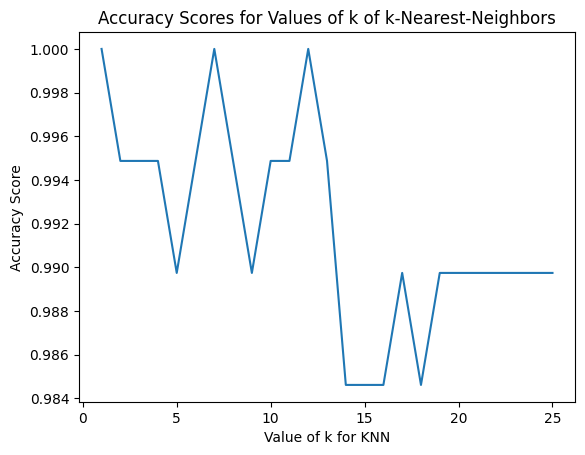

In [ ]:
import matplotlib.pyplot as plt

plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

Prediksi data ke model

In [ ]:

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X, y)
pred = knn.predict([[170, 100,102, 4, 2,103]])

if(pred == 0):
  print("Bill Palsu")
else:
  print("Bill Asli")



Bill Palsu
